In [42]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,BatchNormalization,Reshape
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)


2.1.0


In [44]:
from __future__ import print_function
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [45]:
file = open('humanData.txt')
lines = file.readlines()

processedList = [] 

for i,line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0],line[1],line[2],line[3],line[4],last]
        processedList.append(temp)
    except:
        print('Error occured at line :',i)

Error occured at line : 281873
Error occured at line : 281874
Error occured at line : 281875


In [46]:
processedList

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [47]:
columns = ['user','activity','time','x','y','z']

In [48]:
data = pd.DataFrame(data = processedList, columns = columns)

In [49]:
data


,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164
5,33,Jogging,49106442306000,1.3756552,-2.4925237,-6.510526
6,33,Jogging,49106542312000,-0.61291564,10.56939,5.706926
7,33,Jogging,49106652389000,-0.50395286,13.947236,7.0553403
8,33,Jogging,49106762313000,-8.430995,11.413852,5.134871
9,33,Jogging,49106872299000,0.95342433,1.3756552,1.6480621


In [50]:
data['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [51]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

In [96]:
freq = 20


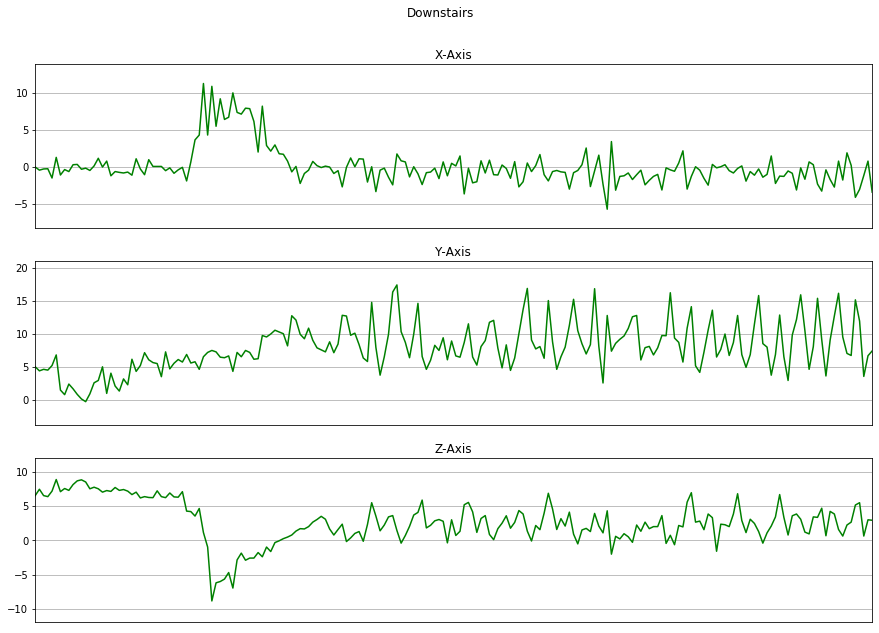

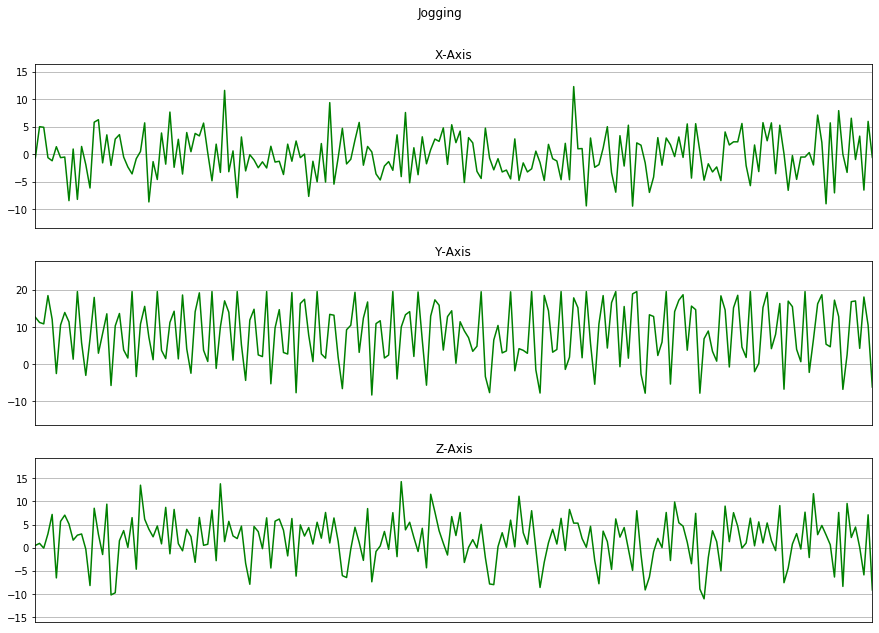

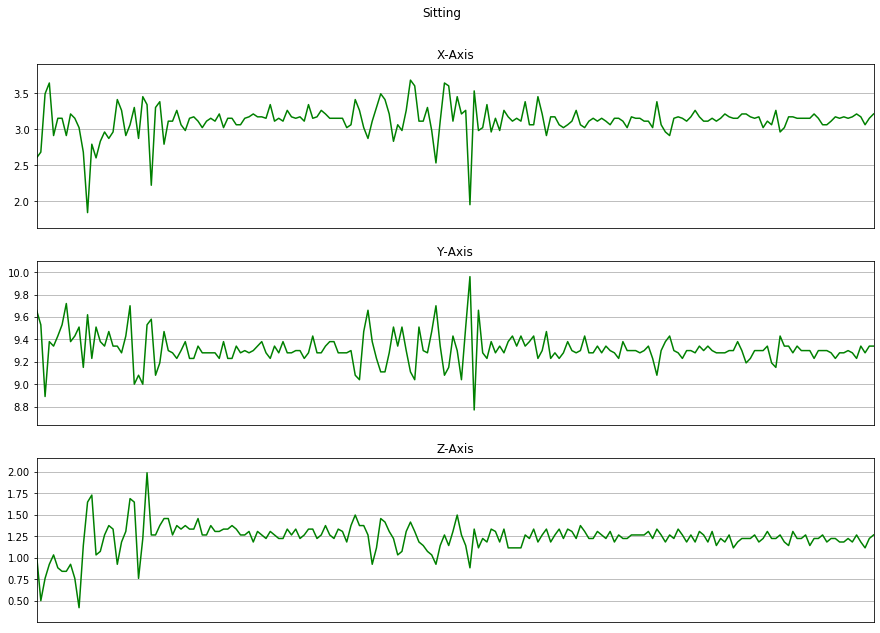

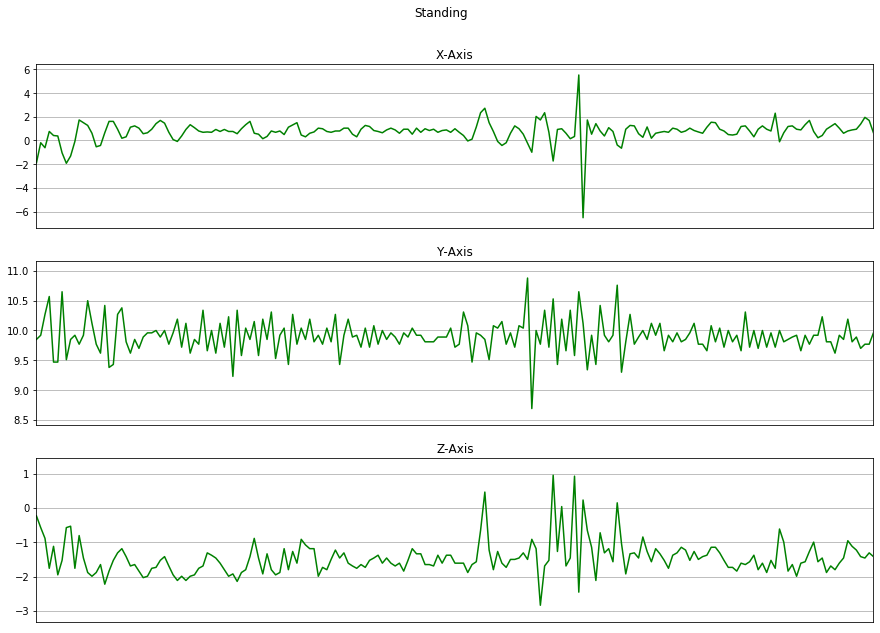

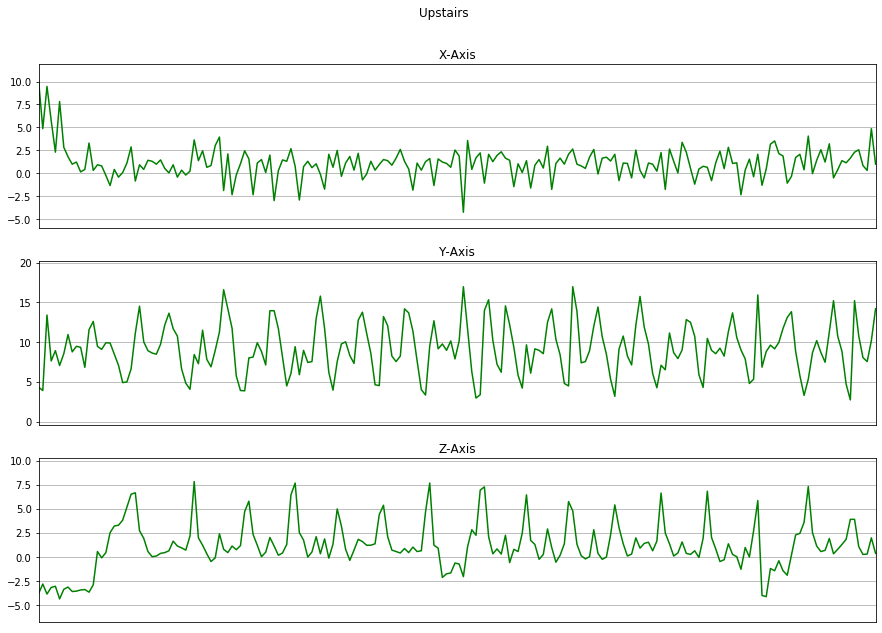

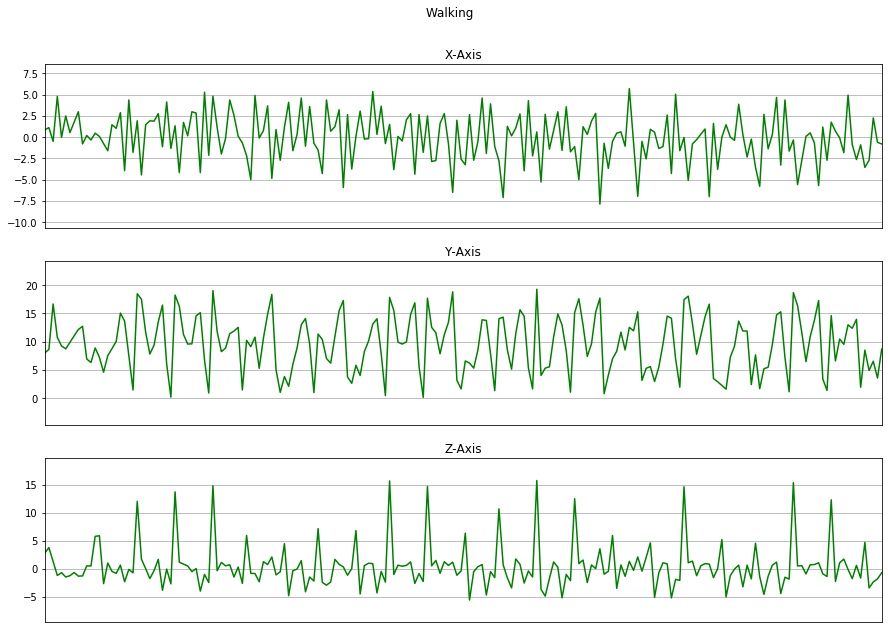

In [97]:
def plot_activity(activity, data):

    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,
         figsize=(15, 10),
         sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):

    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in np.unique(data['activity']):
    subset = data[data['activity'] == activity][:freq*10]
    plot_activity(activity, subset)

In [371]:
df= data.drop(['user','time'],axis = 1).copy()
df.head()
df['activity'].value_counts()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [98]:
Walking = df[df['activity']=='Walking'].head(3555).copy()
Jogging = df[df['activity']=='Jogging'].head(3555).copy()
Upstairs = df[df['activity']=='Upstairs'].head(3555).copy()
Downstairs = df[df['activity']=='Downstairs'].head(3555).copy()
Sitting = df[df['activity']=='Sitting'].head(3555).copy()
Standing = df[df['activity']=='Standing'].head(3555).copy()

In [99]:
balanced_data = pd.DataFrame()
balanced_data  = balanced_data.append([Walking,Jogging,Upstairs,Downstairs,Sitting,Standing])

In [374]:
balanced_data['activity'].value_counts()

Upstairs      3555
Downstairs    3555
Sitting       3555
Standing      3555
Jogging       3555
Walking       3555
Name: activity, dtype: int64

In [101]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
print(balanced_data.head())
print(label.classes_)

    activity         x          y         z  ActivityEncoded  label
597  Walking  0.844462   8.008764  2.792171                5      5
598  Walking  1.116869   8.621680  3.786457                5      5
599  Walking -0.503953  16.657684  1.307553                5      5
600  Walking  4.794363  10.760075 -1.184970                5      5
601  Walking -0.040861   9.234595 -0.694638                5      5
['Downstairs' 'Jogging' 'Sitting' 'Standing' 'Upstairs' 'Walking']


In [103]:
x = balanced_data[['x','y','z']]
y = balanced_data['label']

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

scaled_X = pd.DataFrame(data = X,columns=['x','y','z'])
scaled_X['label'] = y.values

scaled_X.head()

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5


In [105]:
import scipy.stats as stats


In [357]:
freq = 20
frame_size = freq * 4 ##4 sec data is taken
hop_size = freq*2


In [358]:
def get_frames(df,frame_size,hop_size):
    
    N_FEATURES = 3
    
    frames = []
    labels = []
    for i in range(0,len(df)-frame_size,hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        label = stats.mode(df['label'][i: i+frame_size])[0][0]
        frames.append([x,y,z])
        labels.append(label)
        
      
    
    frames = np.asarray(frames).reshape(-1,frame_size,N_FEATURES)
    labels = np.asarray(labels)
    
    return frames,labels

In [359]:
X,y = get_frames(scaled_X,frame_size,hop_size)

In [360]:
X

array([[[ 5.03429609e-04,  7.35899668e-02, -3.61274948e-01],
        [ 1.06025830e+00, -2.37027830e-01,  4.42677021e-01],
        [-8.35460960e-02,  2.45343354e-01,  5.74232736e-01],
        ...,
        [-3.90728982e-01, -8.31974487e-01, -4.79787710e-01],
        [ 1.53617805e+00, -1.82376484e+00, -3.21910879e-01],
        [-1.96419032e-01, -2.16659658e-01, -1.76709113e+00]],

       [[ 1.06756698e+00,  8.08986222e-02, -7.59596607e-01],
        [-2.66262447e-01,  9.46974239e-01,  4.60948619e-01],
        [-1.96830232e-01, -4.12435519e-01, -8.10757194e-01],
        ...,
        [-1.50396308e+00,  3.02759142e-02, -2.53092776e-01],
        [-1.24488310e+00, -6.05279552e-01, -9.25081337e-01],
        [ 4.18769916e+00, -1.57278121e+00, -1.93711227e+00]],

       [[ 7.49640518e-01, -4.30707171e-01,  1.75911115e-01],
        [-1.25293075e+00, -2.04138885e-01, -3.50311967e-01],
        [ 3.18429880e-01,  5.15763521e-01, -1.39910394e+00],
        ...,
        [-1.10724696e+00,  3.85575285e+00,

In [361]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 0,stratify = y)

In [362]:
X_train.shape, X_test.shape,y_train.shape

((425, 80, 3), (107, 80, 3), (425,))

In [363]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [364]:
X_train = X_train.reshape(425,240)
X_test = X_test.reshape(107,240)
print(X_train[0].shape, X_test[0].shape)
print(num_classes)
dummy_y_test = np_utils.to_categorical(y_test,6)
dummy_y_train = np_utils.to_categorical(y_train,6)


(240,) (240,)
6


In [407]:
model_m = Sequential()
# Remark: since coreml cannot accept vector shapes of complex shape like
# [80,3] this workaround is used in order to reshape the vector internally
# prior feeding it into the network
#model_m.add(Reshape((TIME_PERIODS, 3), input_shape=(input_shape,)))
model_m.add(Dense(200, activation='linear', input_shape=X_train[0].shape))
#model_m.add(Dropout(0.5))
model_m.add(Dense(200, activation='relu'))
#model_m.add(Dropout(0.5))
model_m.add(Dense(200, activation='relu'))
#model_m.add(Dropout(0.5))
model_m.add(Dense(200, activation='relu'))
#model_m.add(Dropout(0.5))
model_m.add(Dense(6, activation='softmax'))
print(model_m.summary())

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_134 (Dense)            (None, 200)               48200     
_________________________________________________________________
dense_135 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_136 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_137 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_138 (Dense)            (None, 6)                 1206      
Total params: 170,006
Trainable params: 170,006
Non-trainable params: 0
_________________________________________________________________
None


In [408]:
model_m.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

print(X_test.shape,y_test.shape)

(107, 240) (107,)


In [409]:
history = model_m.fit(X_train,dummy_y_train,epochs = 100,validation_data=(X_test,dummy_y_test),verbose=1,batch_size=128)


Train on 425 samples, validate on 107 samples
Epoch 1/100
425/425 [==============================] - 0s 474us/step - loss: 1.6089 - accuracy: 0.3059 - val_loss: 1.2673 - val_accuracy: 0.4486
Epoch 2/100
425/425 [==============================] - 0s 84us/step - loss: 1.0914 - accuracy: 0.6447 - val_loss: 0.9272 - val_accuracy: 0.7664
Epoch 3/100
425/425 [==============================] - 0s 75us/step - loss: 0.7217 - accuracy: 0.8541 - val_loss: 0.7111 - val_accuracy: 0.7944
Epoch 4/100
425/425 [==============================] - 0s 89us/step - loss: 0.4565 - accuracy: 0.8965 - val_loss: 0.5300 - val_accuracy: 0.8131
Epoch 5/100
425/425 [==============================] - 0s 101us/step - loss: 0.2856 - accuracy: 0.9482 - val_loss: 0.4809 - val_accuracy: 0.7944
Epoch 6/100
425/425 [==============================] - 0s 99us/step - loss: 0.1755 - accuracy: 0.9671 - val_loss: 0.4655 - val_accuracy: 0.8037
Epoch 7/100
425/425 [==============================] - 0s 76us/step - loss: 0.1093 - acc

425/425 [==============================] - 0s 59us/step - loss: 2.5983e-04 - accuracy: 1.0000 - val_loss: 0.7123 - val_accuracy: 0.8131
Epoch 57/100
425/425 [==============================] - 0s 70us/step - loss: 2.5304e-04 - accuracy: 1.0000 - val_loss: 0.7153 - val_accuracy: 0.8131
Epoch 58/100
425/425 [==============================] - 0s 56us/step - loss: 2.4662e-04 - accuracy: 1.0000 - val_loss: 0.7187 - val_accuracy: 0.8131
Epoch 59/100
425/425 [==============================] - 0s 59us/step - loss: 2.4018e-04 - accuracy: 1.0000 - val_loss: 0.7213 - val_accuracy: 0.8131
Epoch 60/100
425/425 [==============================] - 0s 66us/step - loss: 2.3374e-04 - accuracy: 1.0000 - val_loss: 0.7232 - val_accuracy: 0.8131
Epoch 61/100
425/425 [==============================] - 0s 59us/step - loss: 2.2794e-04 - accuracy: 1.0000 - val_loss: 0.7260 - val_accuracy: 0.8131
Epoch 62/100
425/425 [==============================] - 0s 54us/step - loss: 2.2218e-04 - accuracy: 1.0000 - val_loss: 

In [410]:
def plot_learningCurve(history,epochs):
    epoch_range = range(1,epochs+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel = ('Accuracy')
    plt.xlabel = ('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    
    
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel = ('Loss')
    plt.xlabel = ('Epoch')
    plt.legend(['Train','val'],loc='upper left')
    plt.show()
    


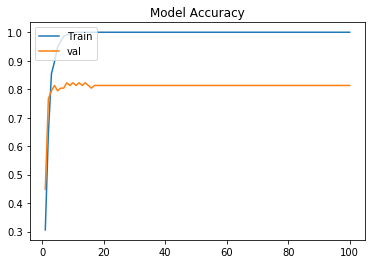

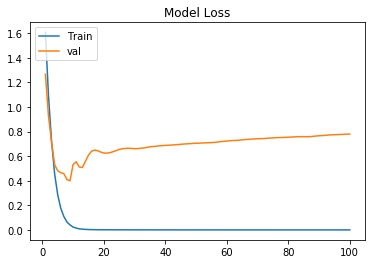

In [412]:
plot_learningCurve(history,100)

In [413]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


TypeError: 'str' object is not callable

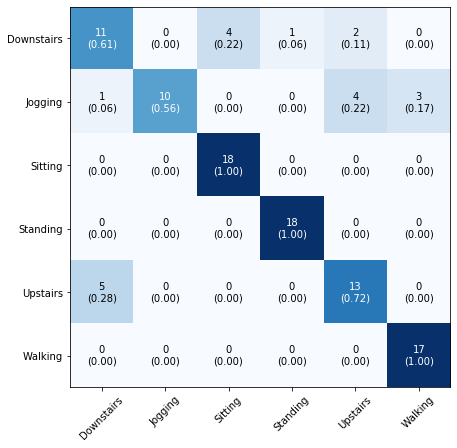

In [414]:
y_pred = model_m.predict_classes(X_test)
mat =  confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names = label.classes_, show_normed=True,figsize=(7,7))

In [415]:
model_m.metrics_names

['loss', 'accuracy']

In [416]:
score = model_m.evaluate(X_test,dummy_y_test,batch_size=128)

107/107 [==============================] - 0s 75us/step


In [419]:
score[1]

0.8130841255187988